# What sells a car?

You're an analyst at Crankshaft List. Hundreds of free advertisements for vehicles are published on your site every day. You need to study data collected over the last few years and determine which factors influence the price of a vehicle.

In [37]:
# Loading all the libraries
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import warnings
warnings.filterwarnings('ignore')


In [3]:
# Load the data file into a DataFrame

data = pd.read_csv('vehicles_us (2).csv')

The dataset contains the following fields:
- `price`
- `model_year`
- `model`
- `condition`
- `cylinders`
- `fuel` — gas, diesel, etc.
- `odometer` — the vehicle's mileage when the ad was published
- `transmission`
- `paint_color`
- `is_4wd` — whether the vehicle has 4-wheel drive (Boolean type)
- `date_posted` — the date the ad was published
- `days_listed` — from publication to removal

In [5]:
# print the general/summary information about the DataFrame
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    47906 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     46265 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        25572 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


In [6]:
# sample of data
display(data.head())

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28


,price,model_year,cylinders,odometer,is_4wd,days_listed
count,51525.000000,47906.000000,46265.000000,43633.000000,25572.0,51525.00000
mean,12132.464920,2009.750470,6.125235,115553.461738,1.0,39.55476
std,10040.803015,6.282065,1.660360,65094.611341,0.0,28.20427
min,1.000000,1908.000000,3.000000,0.000000,1.0,0.00000
25%,5000.000000,2006.000000,4.000000,70000.000000,1.0,19.00000
50%,9000.000000,2011.000000,6.000000,113000.000000,1.0,33.00000
75%,16839.000000,2014.000000,8.000000,155000.000000,1.0,53.00000
max,375000.000000,2019.000000,12.000000,990000.000000,1.0,271.00000


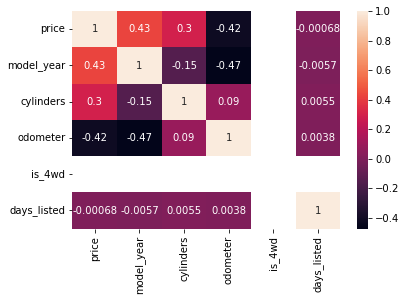

In [7]:
display(data.describe())
#corr between numeric columns 
corrMatrix = data.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

In [8]:
# All the rows that have missing values 
display(data.isna().sum().to_frame().style.background_gradient(cmap ='plasma' ))
# percentage of that miss data for each columns 
x = (data.isna().sum()/len(data))*100
display(x.to_frame().style.background_gradient(cmap ='plasma' ))
# is_4wd column have the most values missing shown by the yellow highlight

,0
price,0
model_year,3619
model,0
condition,0
cylinders,5260
fuel,0
odometer,7892
transmission,0
type,0
paint_color,9267


,0
price,0.000000
model_year,7.023775
model,0.000000
condition,0.000000
cylinders,10.208637
fuel,0.000000
odometer,15.316836
transmission,0.000000
type,0.000000
paint_color,17.985444


In [9]:
#Checking all the unique values in  is_4wd
display(data.is_4wd.value_counts())
# nan values represnt 0 false 

1.0    25572
Name: is_4wd, dtype: int64

In [10]:
#Changing nan values to zero 
# Since is_4WD column is a boolean Dtype I changed values to 0 signfing false 
data.is_4wd = data.is_4wd.fillna(0)
display(data.is_4wd.value_counts())

0.0    25953
1.0    25572
Name: is_4wd, dtype: int64

In [11]:
#most Frequent element occuring in the paint color column 
display(data.paint_color.value_counts().to_frame().style.highlight_max())
# There are 9000 rows with missing values. Will be changing to Unknown 
data.paint_color = data.paint_color.fillna('unknown')

,paint_color
white,10029
black,7692
silver,6244
grey,5037
blue,4475
red,4421
green,1396
brown,1223
custom,1153
yellow,255


In [12]:
#Grouping the values according to there condition and replacing there values with the median
grouped_by_condition = data.groupby('condition').agg({'odometer': 'median'})

#now we want to fill in null values in each group
for cond in data['condition'].unique():
    #so we use .loc to find corresponding value in our grouped dataframe
    data.loc[(data['condition'] == cond) & (data['odometer'].isna()), 'odometer'] = \
        grouped_by_condition.loc[grouped_by_condition.index == cond, 'odometer'][0]

In [13]:
#Filling in miss values according to there model for cylinders
grouped_cylinders = data.groupby('model').agg({'cylinders': 'median'})

for mod in data['model'].unique():
    data.loc[(data['model'] == mod) &(data['cylinders'].isna()),'cylinders'] = \
         grouped_cylinders.loc[grouped_cylinders.index == mod ,'cylinders'][0]

In [14]:
#Filling in miss values according to there model for model_year
grouped_model = data.groupby('model').agg({'model_year':"median"})

for year in data['model'].unique():
    data.loc[(data['model'] == year) & (data['model_year'].isna()),'model_year'] = \
         grouped_model.loc[grouped_model.index == year,'model_year'][0]

In [15]:
#checking if there is no na values in the dataset
assert data.notnull().values.any()
#checking for duplicates
data.duplicated().sum()

0

In [16]:
#here we calculate medians for each group
grouped_by_condition = data.groupby('condition').agg({'odometer': 'median'})

#now we want to fill in null values in each group
for cond in data['condition'].unique():
    #so we use .loc to find corresponding value in our grouped dataframe
    data.loc[(data['condition'] == cond) & (data['odometer'].isna()), 'odometer'] = \
        grouped_by_condition.loc[grouped_by_condition.index == cond, 'odometer'][0]

In [17]:
#Changing date_posted column data type to date_time
data.date_posted = pd.to_datetime(data.date_posted)
#Changing transmission to category 
data.transmission = data.transmission.astype('category')
#changing is_4wd to bool dtype 
data.is_4wd = data.is_4wd.astype('bool')
#changing model to category dtype 
data.model = data.model.astype('category')
data.paint_color  = data.paint_color .astype('category')
data.model_year = data.model_year.astype('int64')
data.cylinders = data.cylinders.astype('int64')

display(data.dtypes)

price                    int64
model_year               int64
model                 category
condition               object
cylinders                int64
fuel                    object
odometer               float64
transmission          category
type                    object
paint_color           category
is_4wd                    bool
date_posted     datetime64[ns]
days_listed              int64
dtype: object

In [18]:
# Add the vehicle's age when the ad was placed
data['vehicles_age'] = data.date_posted.dt.year - data.model_year
display(data.head())

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,vehicles_age
0,9400,2011,bmw x5,good,6,gas,145000.0,automatic,SUV,unknown,True,2018-06-23,19,7
1,25500,2011,ford f-150,good,6,gas,88705.0,automatic,pickup,white,True,2018-10-19,50,7
2,5500,2013,hyundai sonata,like new,4,gas,110000.0,automatic,sedan,red,False,2019-02-07,79,6
3,1500,2003,ford f-150,fair,8,gas,181613.0,automatic,pickup,unknown,False,2019-03-22,9,16
4,14900,2017,chrysler 200,excellent,4,gas,80903.0,automatic,sedan,black,False,2019-04-02,28,2


In [19]:
# Add the vehicle's mileage per year 
# Shows the mileage from the date it was posted
data['vehicle_mileage'] = (data.odometer/data.vehicles_age).round(2)

#changing infinte values 
data.loc[data['vehicle_mileage'] == np.inf,'vehicle_mileage'] = data.odometer

In [20]:
# It might help to replace the condition values with something that can be manipulated more easily
cond = {'new':5,'like new':4,'excellent':3,'good':2,'fair':1,'salvage':0}
data.condition.replace(cond, inplace = True)

In [21]:
# print the general/summary information about the DataFrame
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   price            51525 non-null  int64         
 1   model_year       51525 non-null  int64         
 2   model            51525 non-null  category      
 3   condition        51525 non-null  int64         
 4   cylinders        51525 non-null  int64         
 5   fuel             51525 non-null  object        
 6   odometer         51525 non-null  float64       
 7   transmission     51525 non-null  category      
 8   type             51525 non-null  object        
 9   paint_color      51525 non-null  category      
 10  is_4wd           51525 non-null  bool          
 11  date_posted      51525 non-null  datetime64[ns]
 12  days_listed      51525 non-null  int64         
 13  vehicles_age     51525 non-null  int64         
 14  vehicle_mileage  51523 non-null  float

In [22]:
# print a sample of data
display(data.head())

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,vehicles_age,vehicle_mileage
0,9400,2011,bmw x5,2,6,gas,145000.0,automatic,SUV,unknown,True,2018-06-23,19,7,20714.29
1,25500,2011,ford f-150,2,6,gas,88705.0,automatic,pickup,white,True,2018-10-19,50,7,12672.14
2,5500,2013,hyundai sonata,4,4,gas,110000.0,automatic,sedan,red,False,2019-02-07,79,6,18333.33
3,1500,2003,ford f-150,1,8,gas,181613.0,automatic,pickup,unknown,False,2019-03-22,9,16,11350.81
4,14900,2017,chrysler 200,3,4,gas,80903.0,automatic,sedan,black,False,2019-04-02,28,2,40451.50


count     51525.000000
mean      12132.464920
std       10040.803015
min           1.000000
25%        5000.000000
50%        9000.000000
75%       16839.000000
max      375000.000000
Name: price, dtype: float64

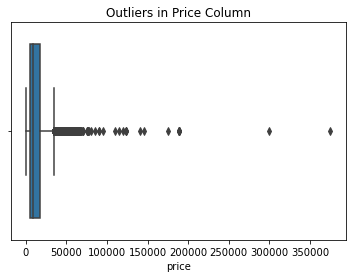

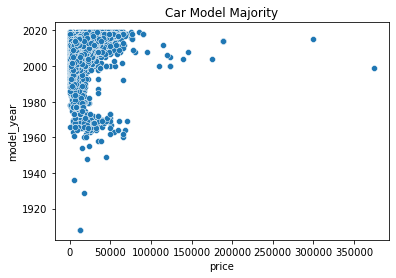

<AxesSubplot:ylabel='Frequency'>

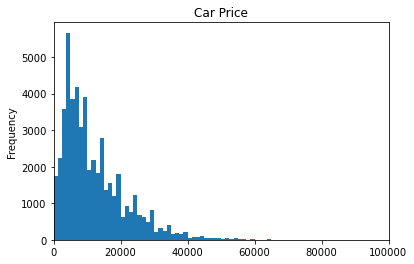

There are 17 outlier rows in the price dataset


In [23]:
#general  descriptive statistics
display(data.price.describe())




#there are outliers in the column price
sns.boxplot(x = data.price)
plt.title('Outliers in Price Column')
plt.show()


#  the majority of the cars price are 100k with some outliers 
sns.scatterplot(x = data.price ,y = data.model_year)
plt.title('Car Model Majority')
plt.show()



#we can see the majority of the prices are between 0 - 100,000

display(data.price.plot(kind = 'hist' ,xlim = (0,100000), bins = 300))
plt.title('Car Price')
plt.show()

print(f"There are {data.query('price > 100000').shape[0]} outlier rows in the price dataset" )

count    51525.000000
mean         8.513906
std          6.112976
min          0.000000
25%          4.000000
50%          8.000000
75%         12.000000
max        110.000000
Name: vehicles_age, dtype: float64

C:\Users\15594\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


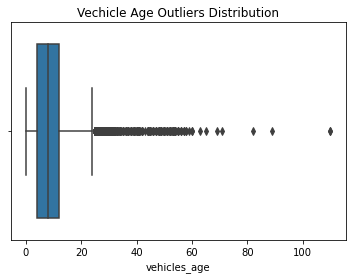

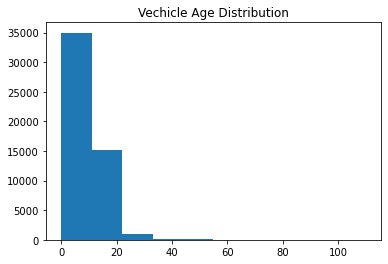

In [24]:
#general  descriptive statistics
display(data.vehicles_age.describe())
#outliers shown on charts 
sns.boxplot(data.vehicles_age)
plt.title('Vechicle Age Outliers Distribution')
plt.show()
plt.title('Vechicle Age Distribution')
plt.hist(data.vehicles_age)
plt.show()

count     51523.000000
mean      18931.556912
std       16268.402830
min           0.000000
25%       10423.000000
50%       14982.670000
75%       21800.000000
max      373200.000000
Name: vehicle_mileage, dtype: float64

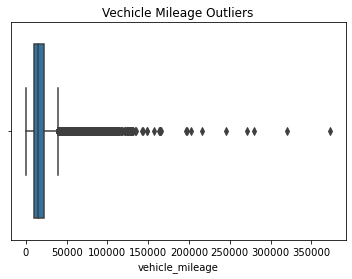

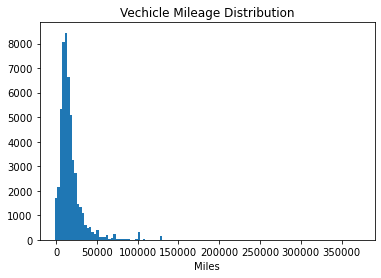

In [38]:
#
#general  descriptive statistics
display(data.vehicle_mileage.describe())

#outliers shown on charts 
sns.boxplot(data.vehicle_mileage)
plt.title('Vechicle Mileage Outliers')
plt.show()
plt.hist(data.vehicle_mileage, align = 'left', bins = 125)
plt.title('Vechicle Mileage Distribution')
plt.xlabel('Miles')
plt.show()

8     17712
6     17435
4     15499
10      549
5       294
3        34
12        2
Name: cylinders, dtype: int64

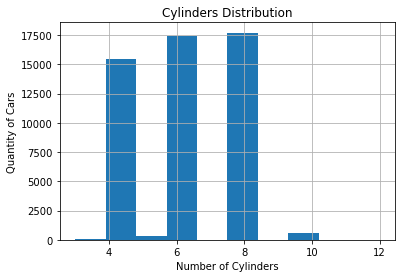

In [26]:
#overview of the cylinder column 
display(data.cylinders.value_counts())
# majority of the cars have 4-8 cylinders
data.cylinders.hist()
plt.title('Cylinders Distribution')
plt.xlabel('Number of Cylinders')
plt.ylabel('Quantity of Cars')
plt.show()


3    24773
2    20145
4     4742
1     1607
5      143
0      115
Name: condition, dtype: int64

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, '3'),
  Text(1, 0, '2'),
  Text(2, 0, '4'),
  Text(3, 0, '1'),
  Text(4, 0, '5'),
  Text(5, 0, '0')])

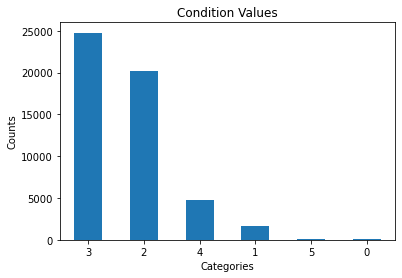

In [39]:
# Counting all the values in the condition column 
display(data.condition.value_counts())
data.condition.value_counts().plot(kind = 'bar')
plt.title('Condition Values')
plt.xlabel('Categories')
plt.ylabel('Counts')
plt.xticks(rotation =0)

In [40]:
cols = ['price','vehicles_age','odometer','vehicle_mileage','cylinders'] 

Q1 = data[cols].quantile(0.25)
Q3 = data[cols].quantile(0.75)
IQR = Q3 - Q1

lower_range = Q1 - (1.5* IQR)
print(f'Lower Range \n{lower_range}')
print()
upper_range = Q3 + (1.5 * IQR)
print(f'Lower Range \n{upper_range}')



new = data[~((data[cols] < (Q1 - 1.5 * IQR)) | (data[cols] > (Q3 + 1.5 * IQR))).any(axis=1)]
display(new.head())

Lower Range 
price             -12758.5
vehicles_age          -8.0
odometer          -32561.5
vehicle_mileage    -6642.5
cylinders             -2.0
dtype: float64

Lower Range 
price               34597.5
vehicles_age           24.0
odometer           256050.5
vehicle_mileage     38865.5
cylinders              14.0
dtype: float64


,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,vehicles_age,vehicle_mileage
0,9400,2011,bmw x5,2,6,gas,145000.0,automatic,SUV,unknown,True,2018-06-23,19,7,20714.29
1,25500,2011,ford f-150,2,6,gas,88705.0,automatic,pickup,white,True,2018-10-19,50,7,12672.14
2,5500,2013,hyundai sonata,4,4,gas,110000.0,automatic,sedan,red,False,2019-02-07,79,6,18333.33
3,1500,2003,ford f-150,1,8,gas,181613.0,automatic,pickup,unknown,False,2019-03-22,9,16,11350.81
5,14990,2014,chrysler 300,3,6,gas,57954.0,automatic,sedan,black,True,2018-06-20,15,4,14488.50


Text(0.5, 69.0, 'Cylinder')

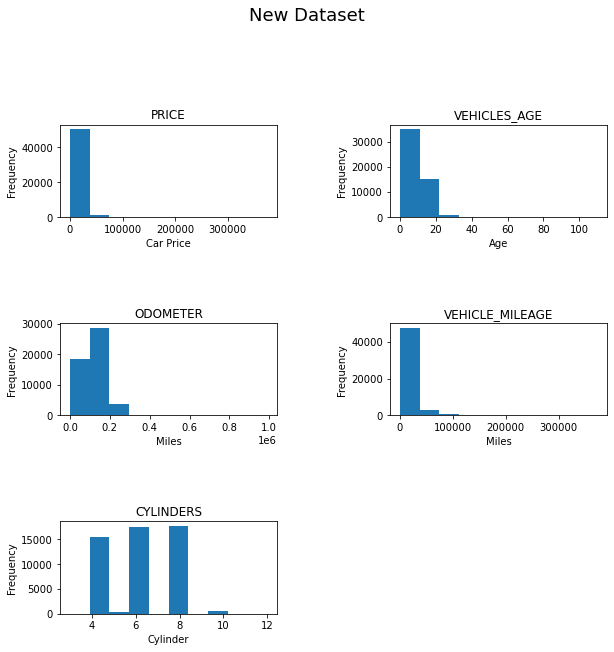

In [41]:
#old dataset with all outliers 
fig,axs = plt.subplots(3,2, figsize = (10,10))
fig.suptitle("New Dataset", fontsize=18, y=0.95)
axs[2][1].set_visible(False)
for col, ax in zip(cols, axs.ravel()):
    # filter df for ticker and plot on specified axes
    data[col].plot(kind = 'hist',ax = ax)
    ax.set_title(col.upper())
fig.tight_layout(pad=6.0)
axs[0][0].set_xlabel('Car Price')
axs[0][1].set_xlabel('Age')
axs[1][0].set_xlabel('Miles')
axs[1][1].set_xlabel('Miles')
axs[2][0].set_xlabel('Cylinder')
    

Text(0.5, 69.0, 'Cylinder')

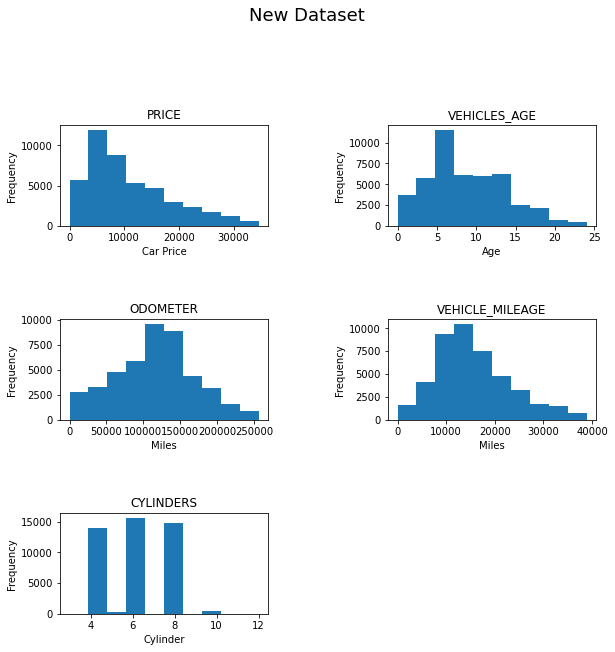

In [42]:
#New dataset with no outliers. Each graph is much more centered without any outliers causing distort in our analysis
fig,axs = plt.subplots(3,2, figsize = (10,10))
fig.suptitle("New Dataset", fontsize=18, y=0.95)
axs[2][1].set_visible(False)
for col, ax in zip(cols, axs.ravel()):
    # filter df for ticker and plot on specified axes
    new[col].plot(kind = 'hist',ax = ax)
    ax.set_title(col.upper())
fig.tight_layout(pad=6.0)
axs[0][0].set_xlabel('Car Price')
axs[0][1].set_xlabel('Age')
axs[1][0].set_xlabel('Miles')
axs[1][1].set_xlabel('Miles')
axs[2][0].set_xlabel('Cylinder')

<AxesSubplot:>

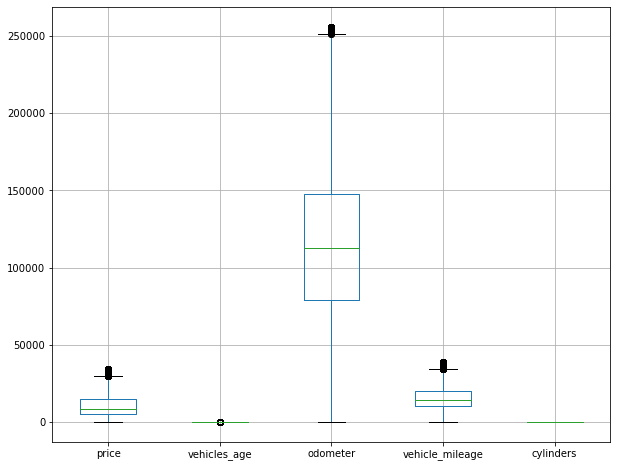

In [43]:
new.boxplot(cols, figsize = (10,8))

## Ads lifetime

The average for days_listed: 39.53943140774225
The median for days_listed: 33.0
The Lower range for days_listed: 19.0
The Higher range for days_listed: 53.0
A total of 10991 ads were removed quickly.
A total of 11214 ads took long to be remove.


Text(0, 0.5, 'Frequency')

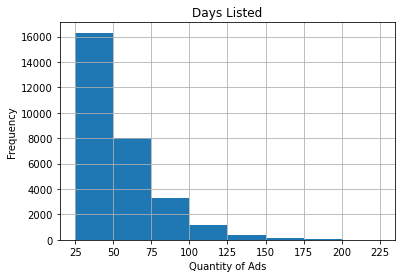

In [44]:
print(f'The average for days_listed: {new.days_listed.mean()}')
print(f'The median for days_listed: {new.days_listed.median()}')
quantile25 = new.days_listed.quantile(q = .25)
print(f'The Lower range for days_listed: {quantile25}')
quantile75 = new.days_listed.quantile(q = .75)
print(f'The Higher range for days_listed: {quantile75}')
quickly = new.query('days_listed < @quantile25').shape[0]
print(f'A total of {quickly} ads were removed quickly.')

long = new.query('days_listed > @quantile75').shape[0]
print(f'A total of {long} ads took long to be remove.')





#plotting a histogram of the days_listed column 
new.days_listed.hist(bins =[25, 50, 75, 100, 125, 150, 175, 200, 225])
plt.title('Days Listed')
plt.xlabel('Quantity of Ads')
plt.ylabel('Frequency')

## Average price per each type of vehicle

Text(0.5, 1.0, 'Type by Quantity of Ads ')

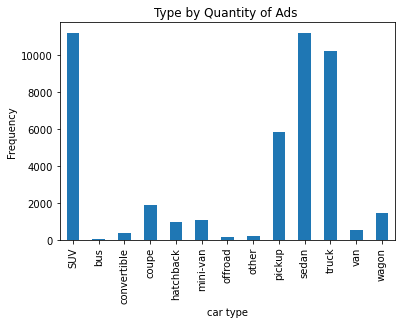

In [45]:
#Using a pivot table to disply the number of ads and avg price for each vehicle 
new_pivot = new.pivot_table(index ='type',values = ['price','days_listed'], 
                            aggfunc = {'price':'mean','days_listed':'count'})
#renaming and sorting columns 
new_pivot.rename(columns = {"days_listed":"Number of Ads","price":"Avg Price"}, inplace = True)
new_pivot.sort_values('Number of Ads',ascending=False,inplace = True)
#We can see that SUV and Sedan are the top two types with the greatest number of ads 
new.groupby('type')['days_listed'].count().plot(kind = "bar")
plt.xlabel('car type')
plt.ylabel('Frequency')
plt.title('Type by Quantity of Ads ')


## Price factors

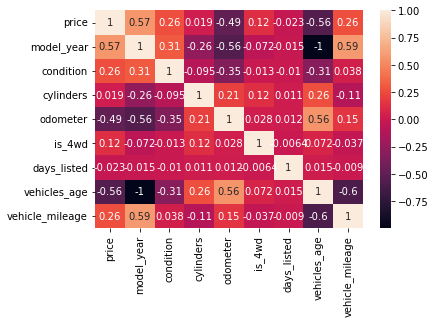

<AxesSubplot:>

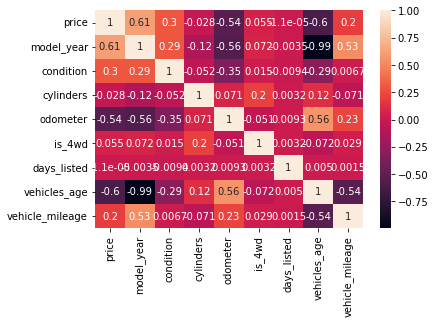

In [46]:
#plotting a correlation  matrix to understand the correlation between price other columns 

suv = new[new['type'] == 'SUV'].corr()
sns.heatmap(suv, annot=True)
plt.show()
sedan = new[new['type'] == 'sedan'].corr()
sns.heatmap(sedan, annot=True)


In [47]:
#Getting data frame where type is equal to popular car type 
suvv = new[new['type'] == 'SUV']
sedann = new[new['type'] == 'sedan']

#setting dataframe where  it greater than or equal to  50 ads 
suvv = suvv[suvv['days_listed'] >= 50]
sedann = sedann[sedann['days_listed'] >= 50]

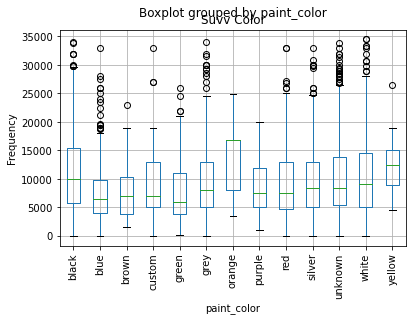

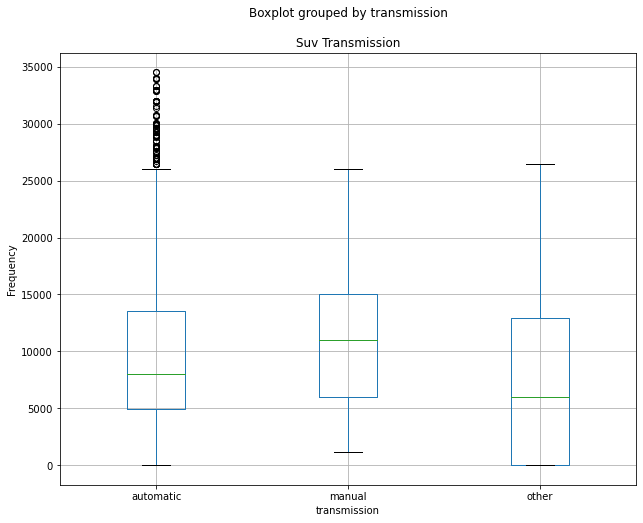

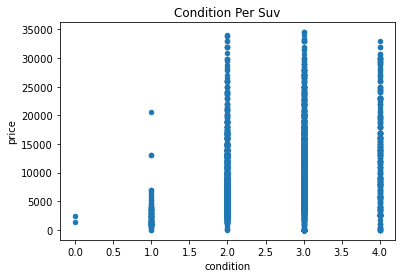

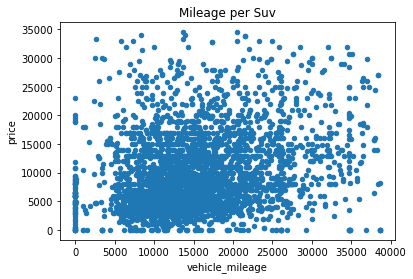

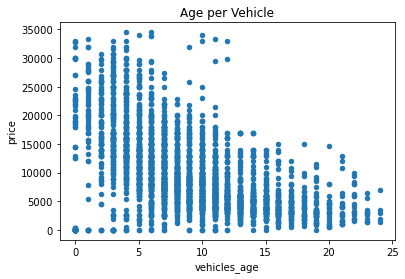

In [48]:
#plotting box plot between paint and price
suvv.boxplot( by = 'paint_color',column = 'price')
plt.title('Suvv Color')
plt.xticks(rotation = 90)
plt.ylabel('Frequency')
plt.show()


#plotting box plot between transmission and price
suvv.boxplot(by='transmission', column='price', figsize=(10,8))
plt.title('Suv Transmission')
plt.ylabel('Frequency')
plt.show()

#plotting multiple scatter plots between Condition,vehicle_mileage,and vehicles_age towards price
# Charts shows with majority betweem 2-4 on the condition
suvv.plot(kind = 'scatter' ,y = 'price', x = 'condition')
plt.title('Condition Per Suv')
plt.show()

# Majority of the Cars are priced between 0-20,000 and have an average mileage between 0 - 25000
suvv.plot(kind = 'scatter' ,y = 'price', x = 'vehicle_mileage')
plt.title('Mileage per Suv')
plt.show()

# All the newer cars are priced more expensive then the older cars 
suvv.plot(kind = 'scatter' ,y = 'price', x = 'vehicles_age')
plt.title('Age per Vehicle')
plt.show()

In [50]:
suvv.head(2)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,vehicles_age,vehicle_mileage
7,15990,2013,honda pilot,3,6,gas,109473.0,automatic,SUV,black,True,2019-01-07,68,6,18245.5
34,9500,2008,toyota highlander,2,6,gas,149799.0,automatic,SUV,unknown,False,2018-06-04,121,10,14979.9


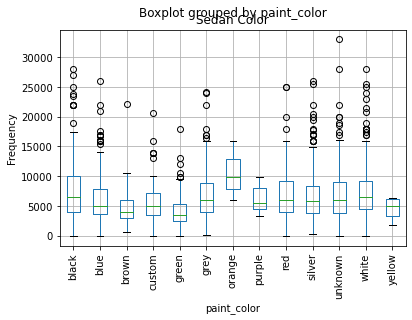

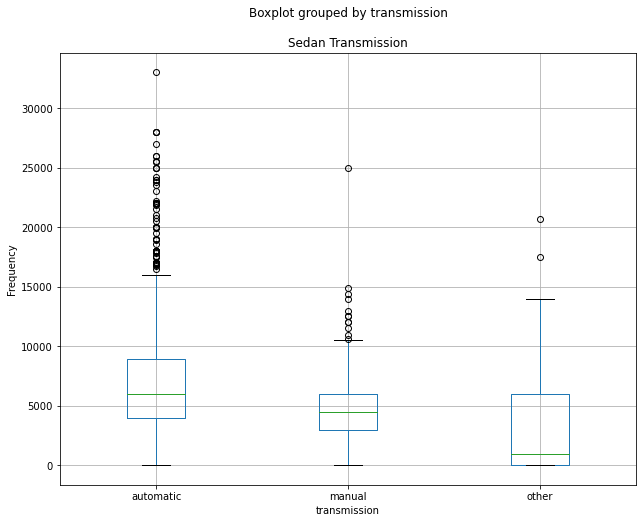

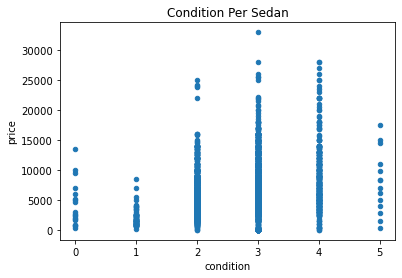

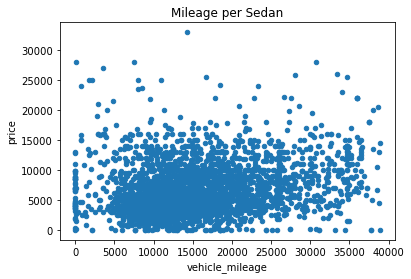

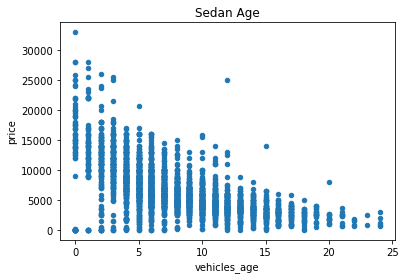

In [51]:
#plotting box plot between paint and price
sedann.boxplot( by = 'paint_color',column = 'price')
plt.title('Sedan Color')
plt.xticks(rotation = 90)
plt.ylabel('Frequency')
plt.show()



#plotting box plot between transmission and price
sedann.boxplot(by='transmission', column='price', figsize=(10,8))
plt.title('Sedan Transmission')
plt.ylabel('Frequency')
plt.show()


#plotting multiple scatter plots between Condition,vehicle_mileage,and vehicles_age towards price
# majority of the condtion was between 2 -4
sedann.plot(kind = 'scatter' ,y = 'price', x = 'condition')
plt.title('Condition Per Sedan')
plt.show()

#Majortiy of the Vehicles were priced below 15,000
sedann.plot(kind = 'scatter' ,y = 'price', x = 'vehicle_mileage')
plt.title('Mileage per Sedan')
plt.show()

#The older the car the lower it was priced. 
sedann.plot(kind = 'scatter' ,y = 'price', x = 'vehicles_age')
plt.title('Sedan Age')
plt.show()


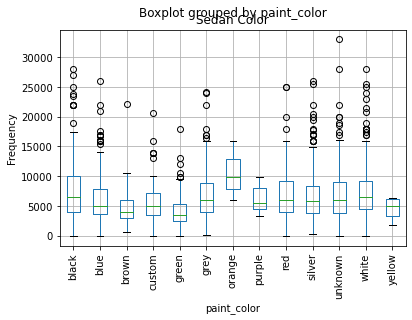

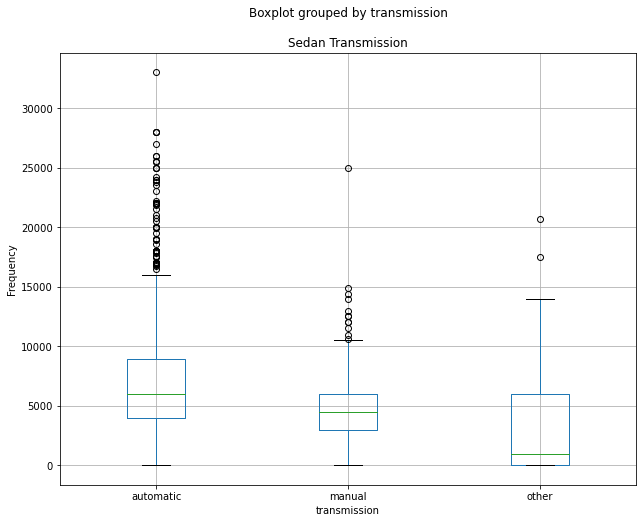

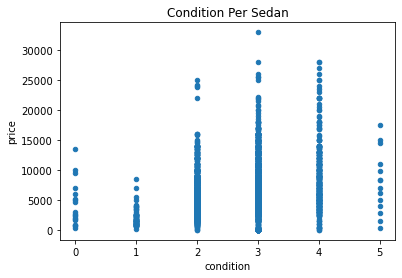

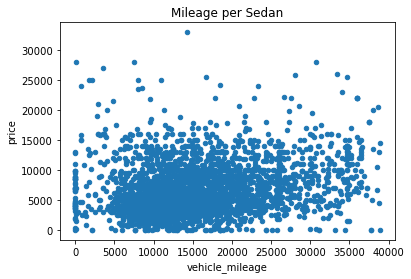

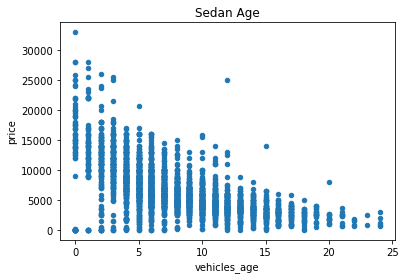

In [52]:
#plotting box plot between paint and price
sedann.boxplot( by = 'paint_color',column = 'price')
plt.title('Sedan Color')
plt.xticks(rotation = 90)
plt.ylabel('Frequency')
plt.show()



#plotting box plot between transmission and price
sedann.boxplot(by='transmission', column='price', figsize=(10,8))
plt.title('Sedan Transmission')
plt.ylabel('Frequency')
plt.show()


#plotting multiple scatter plots between Condition,vehicle_mileage,and vehicles_age towards price
# majority of the condtion was between 2 -4
sedann.plot(kind = 'scatter' ,y = 'price', x = 'condition')
plt.title('Condition Per Sedan')
plt.show()

#Majortiy of the Vehicles were priced below 15,000
sedann.plot(kind = 'scatter' ,y = 'price', x = 'vehicle_mileage')
plt.title('Mileage per Sedan')
plt.show()

#The older the car the lower it was priced. 
sedann.plot(kind = 'scatter' ,y = 'price', x = 'vehicles_age')
plt.title('Sedan Age')
plt.show()


## General conclusion

The vehcile dataset containing free advertisment for paticular cars. I took the dataset through exploratory data analysis: removing several outliers from different columns, changing values within  columns, and plotting different charts to get a clear picture. We can conclude that the price is mostly affected by the model_year. A brand new car is more expensive then the rest. The two popular type of cars in the datset were SUV and Sedans. The majority condition for these cars were between 2-4. An automatic was more expensive in the sedan type. In a SUV a manual transmission is more expensive. Orange color is more expensive in both cars